In [1]:
"""
Created on Thu Oct  1 00:13:47 2020

@author: Simone Rossetti
"""

import os
import configAVA as cfg

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= cfg.GPU

import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_devices = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_devices), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

from matplotlib import pyplot as plt
import numpy as np
autotune = tf.data.experimental.AUTOTUNE

from datasetAVA import Dataset

1 Physical GPUs, 1 Logical GPUs


In [17]:
data  = Dataset()

classes = data.action_classes

2266526741it [00:27, 83401826.74it/s] 
31819it [00:00, 62568475.84it/s]        


In [18]:

train_data = tf.data.Dataset.from_generator(data.batch_generator, output_types= (tf.uint8, tf.uint8, tf.float16, tf.int16, tf.int8 )) ## returns frames, masks, bbox, ids, actions #tf.string for full json 

#images, mask, bbox, ids, actions = next(iter(train_data))

In [19]:
from PIL import Image
import json
import matplotlib.pyplot as plt


(61, 360, 484, 3)
(61, 1, 360, 484)
(61, 1, 8)
(1,)
(1, 3)


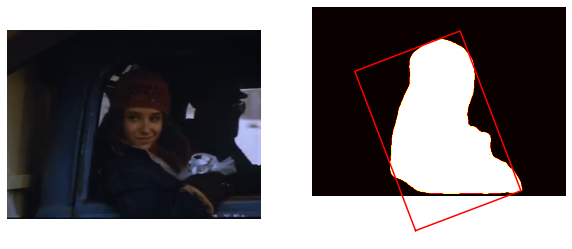

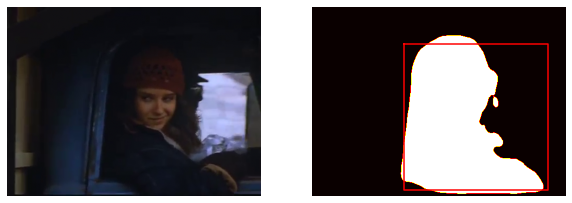

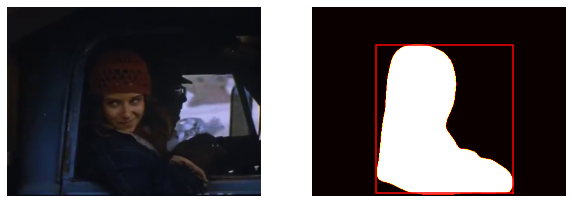

(61, 720, 1280, 3)
(61, 1, 720, 1280)
(61, 1, 8)
(1,)
(1, 1)


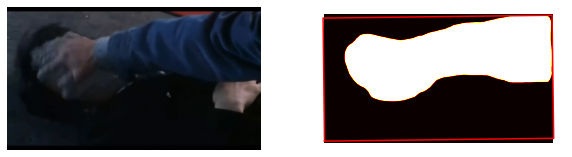

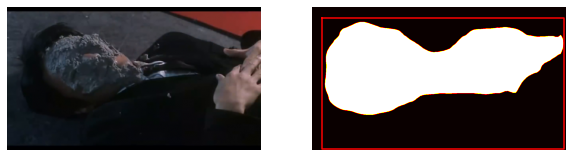

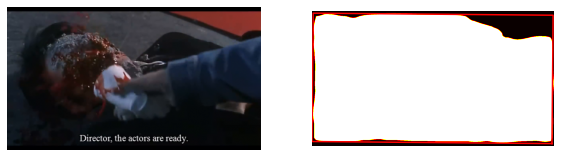

(61, 360, 640, 3)
(61, 2, 360, 640)
(61, 2, 8)
(2,)
(2, 3)


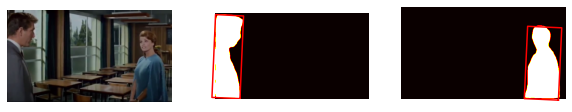

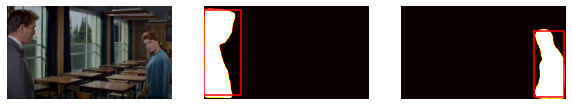

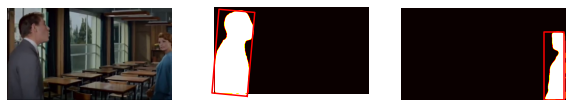

(61, 720, 1228, 3)
(61, 2, 720, 1228)
(61, 2, 8)
(2,)
(2, 3)


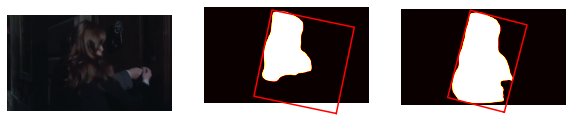

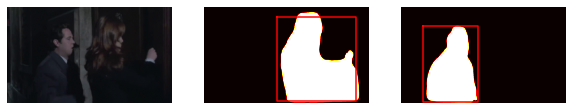

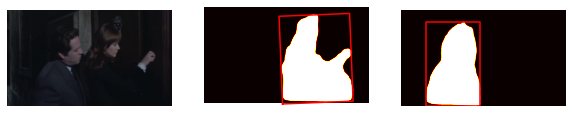

In [28]:
for frames, mask, bbox, ids, actions in train_data.take(4):
    count=0
    print(frames.shape)
    print(mask.shape)
    print(bbox.shape)
    print(ids.shape)
    print(actions.shape)
    H,W,_= frames[0].shape
    for i,j,b in zip(frames.numpy(),mask.numpy(),bbox.numpy()):
        if count==0 or count==30 or count==60: # print just three frames
            fig=plt.figure(figsize=(10, 10))
            columns = j.shape[0]+1
            rows = 1
            img_batch=[i/255]+[k for k in j]
            for n in range(1, columns*rows +1):
                fig.add_subplot(rows, columns, n)
                if n==1:
                    plt.imshow(img_batch[n-1])
                else:
                    plt.imshow(img_batch[n-1],cmap=plt.get_cmap('hot'), vmin=0, vmax=1)
                    x = [int(k*W) for i,k in enumerate(b[n-2]) if i%2==0]
                    y = [int(k*H) for i,k in enumerate(b[n-2]) if not i%2==0]
                    plt.plot(x+[x[0]],y+[y[0]], 'r-') # plot again first point to close the polygon
                plt.axis('off')
            plt.show()
        count+=1

In [15]:
frames, mask, bbox, ids, actions = next(iter(train_data))

In [16]:
bbox

<tf.Tensor: shape=(61, 2, 8), dtype=float16, numpy=
array([[[ 3.7549e-01,  9.9121e-01,  3.7329e-01,  1.2970e-02,
          9.4482e-01,  9.0179e-03,  9.4678e-01,  9.8730e-01],
        [ 5.6104e-01,  9.9902e-01, -2.5892e-04,  9.9414e-01,
          2.3499e-03,  4.8157e-02,  5.6396e-01,  5.3070e-02]],

       [[ 3.7354e-01,  9.9170e-01,  3.7354e-01,  2.4994e-02,
          9.5703e-01,  2.4994e-02,  9.5703e-01,  9.9170e-01],
        [ 5.6104e-01,  9.8975e-01, -3.0303e-04,  9.8291e-01,
          3.2196e-03,  4.9744e-02,  5.6445e-01,  5.6427e-02]],

       [[ 4.7144e-01,  1.2930e+00,  2.5781e-01,  2.7173e-01,
          7.4463e-01, -5.0110e-02,  9.5850e-01,  9.7119e-01],
        [ 5.6152e-01,  9.9219e-01, -3.5596e-04,  9.8242e-01,
          4.7340e-03,  4.3640e-02,  5.6641e-01,  5.3253e-02]],

       [[ 3.8086e-01,  9.9365e-01,  3.7891e-01,  2.1225e-02,
          9.5605e-01,  1.7731e-02,  9.5801e-01,  9.9023e-01],
        [ 5.6738e-01,  9.8877e-01, -2.9111e-04,  9.8438e-01,
          2.0218e-03